# Linear Models I: Simple Linear Regression
Agenda Today:
- Introduce Correlation & Covariance
- Work with simple linear regression
- Introduce $R^2$, coefficient of determination
- linear regression assumptions: define parametric vs. non-parametric models
- building a linear regression model in python with statsmodel 
- diagnostics and evaluations of assumptions

#### True or False?
So you think you know linear regression very well, as $Y = \beta_0 + \beta_1  X_1 + \epsilon$, but...
- Linear regression is highly interpretable
- (Pearson's) correlation coefficients ranges from 0 to 1
- Linear regression can only be used for when predictors and outcomes are __both__ continuous 
- Linear regression is a non-parametric test
- We can use linear regression to draw [causal inference](http://www.stat.columbia.edu/~gelman/arm/chap9.pdf) about experiments
- The bigger the values of the coefficients in a model the more important it is
- We need to calculate the standard error for each predictor in a lr model

## Part I. Pearson's Correlation Coefficients

#### Correlation
Biased (for sample): $r = \frac{\frac{1}{N-1}{\sum{X}{Y}-N\bar X \bar Y}}{s_xs_y}$

Unbiased (for population): $r = \frac{\frac{\sum XY}{N}-\mu_X \mu_Y}{\sigma_x \sigma_y}$

The numerator is the covariance of the two terms, which quantify how much x and y will vary together - i.e. covary. The denominator is the product of the two standard deviation, which bound the value of the pearson's coefficient to not exceed +/-1. 

Pearson's correlation coefficient is a very intuitive idea that we observe in real life, for exampe: 
- Smoking cigarettes and getting lung diseases 
- Educational level and income 
- Population density and housing prices 

Learning about correlations help us understand various machine learning algorithms, feature selections and engineering (correlation and autocorrelation in time series, principal component analysis, dimensionality reduction), as well as gaining a deep understanding of the data at hand. Pearson's correlation also underlies the foundation of linear regression. 

We can also conduct hypothesis testing with correlation. The common null hypothesis is $\rho = 0$

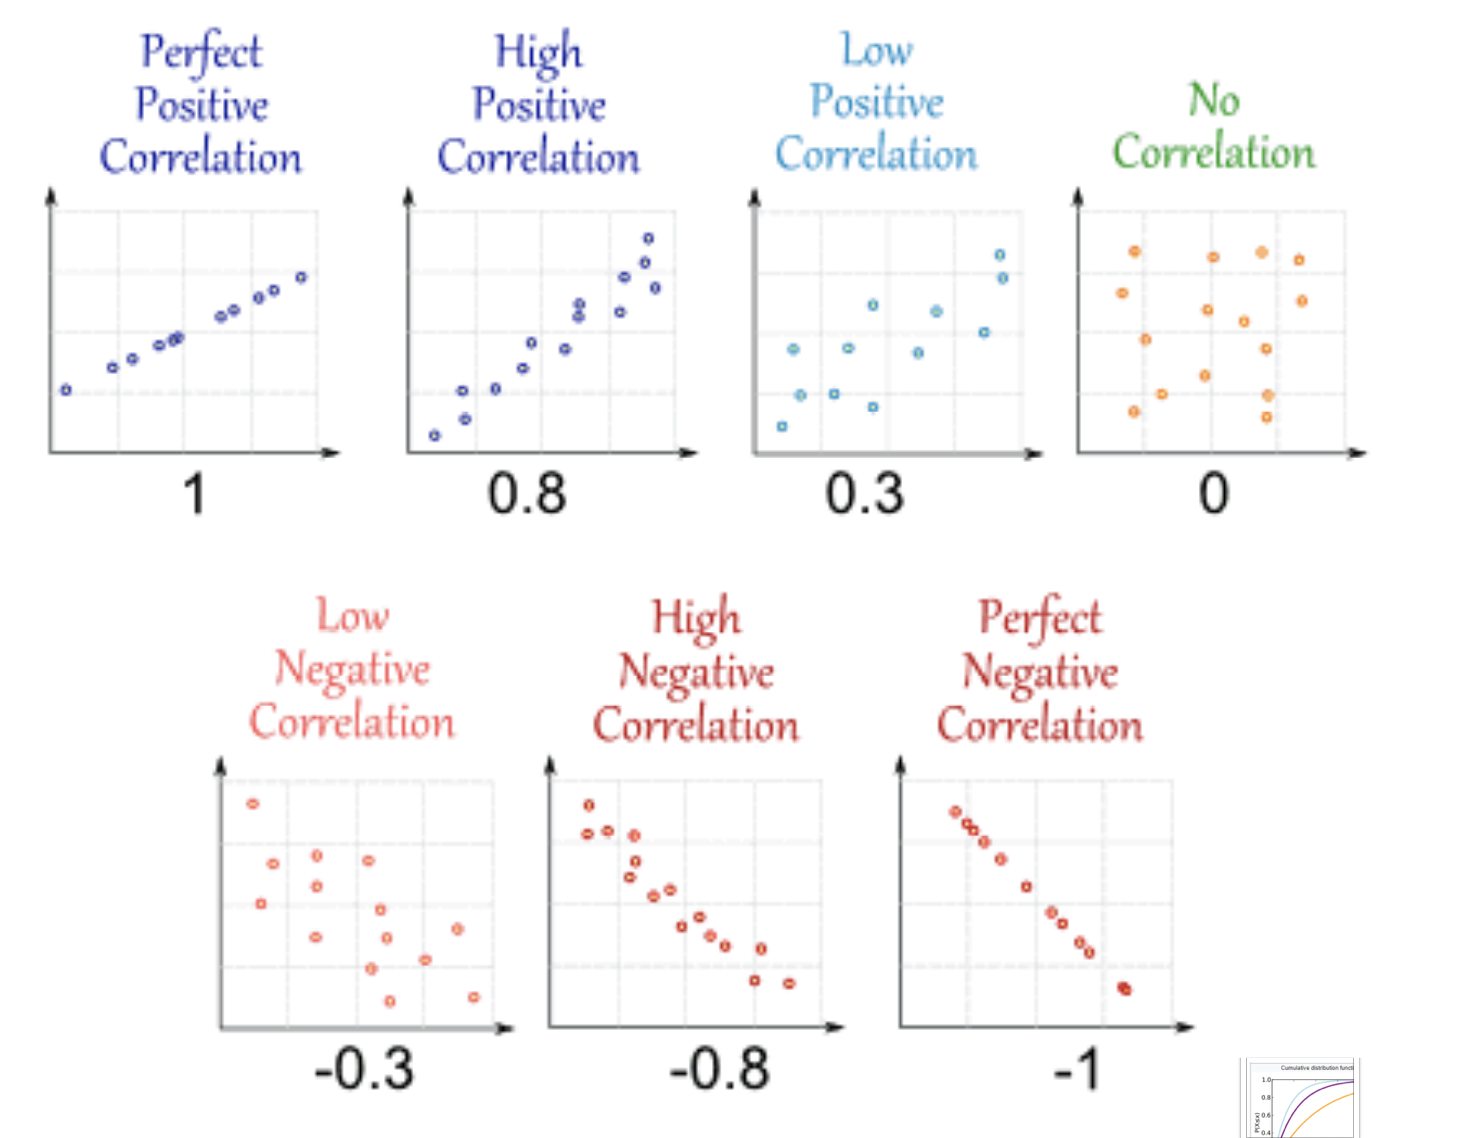

Hypothesis testing with correlation formula:
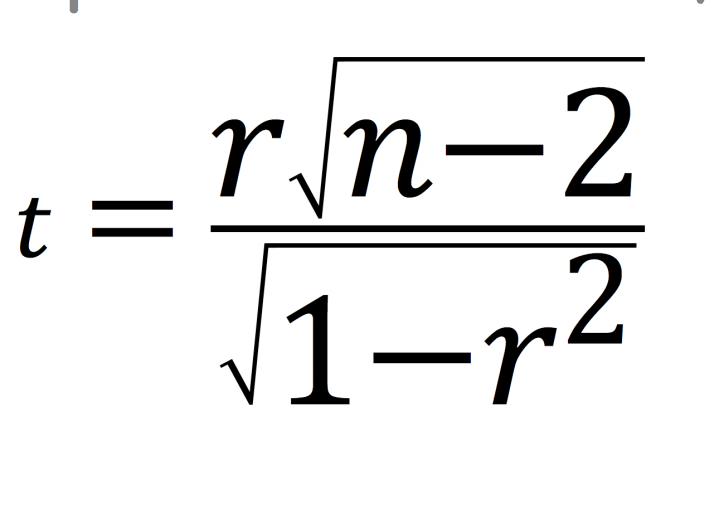

#### Covariance
Covariance measures how much two variables vary together. It is calculated as:
$$\sigma_{XY} = \frac{\sum_{i=1}^{n}(x_i -\mu_x)(y_i - \mu_y)}{n}$$

- $\sigma_{XY}$ = Covariance between $X$ and $Y$
- $x_i$ = ith element of variable $X$
- $y_i$ = ith element of variable $Y$
- $n$ = number of data points ($n$ must be same for $X$ and $Y$)
- $\mu_x$ = mean of the independent variable $X$
- $\mu_y$ = mean of the dependent variable $Y$

## Part II. Building a Simple Linear Regression Model 
By now, we are moving away from simple testing and towards constructing a model. When constructing a model, we are ascribing __predictors__ and __targets__. Models also have parameters that define them. There are two types of models: parametric and non-parametric models. Nonparametric models do not make any assumptions about the data, whereas parametric models make certain assumptions of the underlying data. We will discuss the assumptions of linear regression in greater details in the next section; for now, let's focus on constructing a simple lr model. A simple lr regression model has a predictor and an outcome, and can be expressed as:

<center> $Y = \beta 0 + \beta 1 X 1$ <center> 
    
- Y is the outcome, or target, which usually takes on __continous__ value
- $\beta 0$ is the intercept, which is a constant
- $\beta 1$ is the coefficient for predictor X1
- $X1$ is the value of the variable

The goal of a linear regression is to find a __best fit line__ such that it minimizes the error. But how do we define error and best fit line?

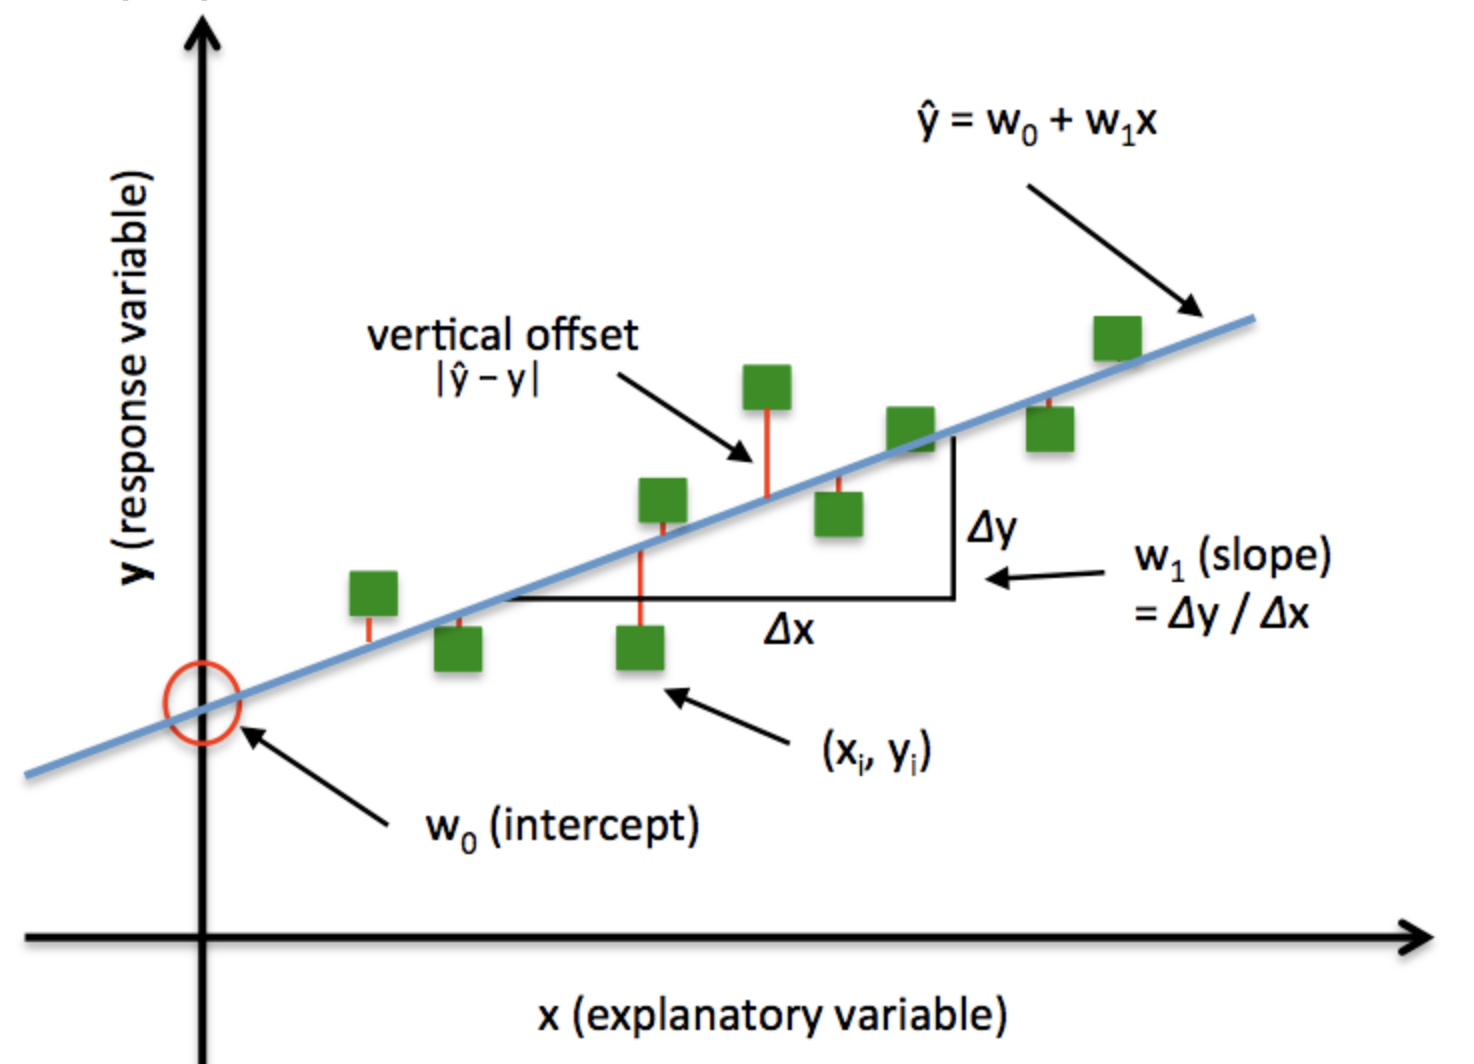

To calculate the best fit line, we need...
- The mean of the X ($\bar X$)

- The mean of the Y ($\bar Y$)

- The standard deviation of the x values ($s x$)

- The standard deviation of the y values ($s y$)

- The correlation between X and Y (denoted $r$ - following Pearson Correlation)

The formula for calculating slope and intercepts are:
- Slope: 
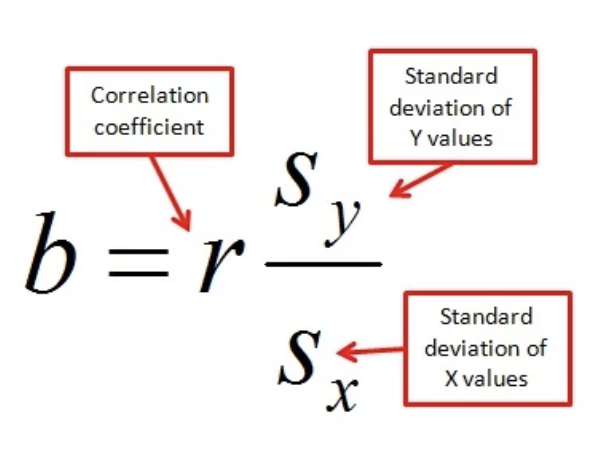
- Intercept
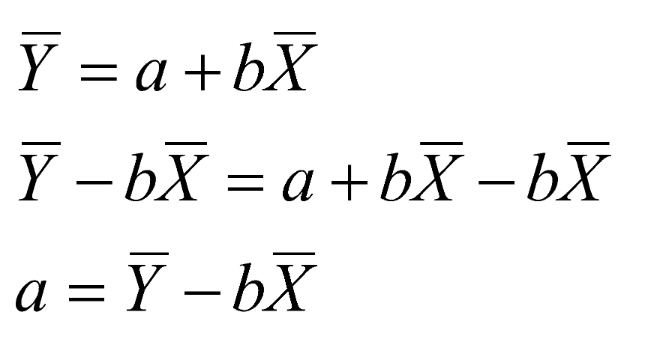


How to interpret this model?

## Part III. Coefficients of Determination and Non-determination: $R^2$
How do we measure and quantify the performance of a linear regression line? We use the $R^2$ value, or known as explained variance, or the coefficient of determination. Essentially, it is a standardized measure for how much of the variance in target is accounted for by the variance in predictor(s). It ranges form 0 to 1, with 1 being a perfect model in which all of the variance in target is accounted for by variance in predictors. 

The baseline model would have a $R^2$ of 0, which is the mean value of the response, or target variable. 
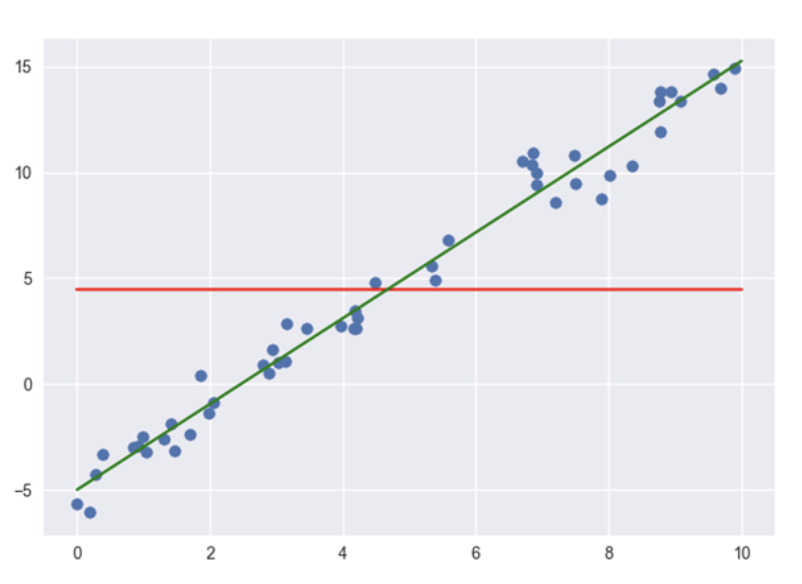

Variance, error, and resisual:
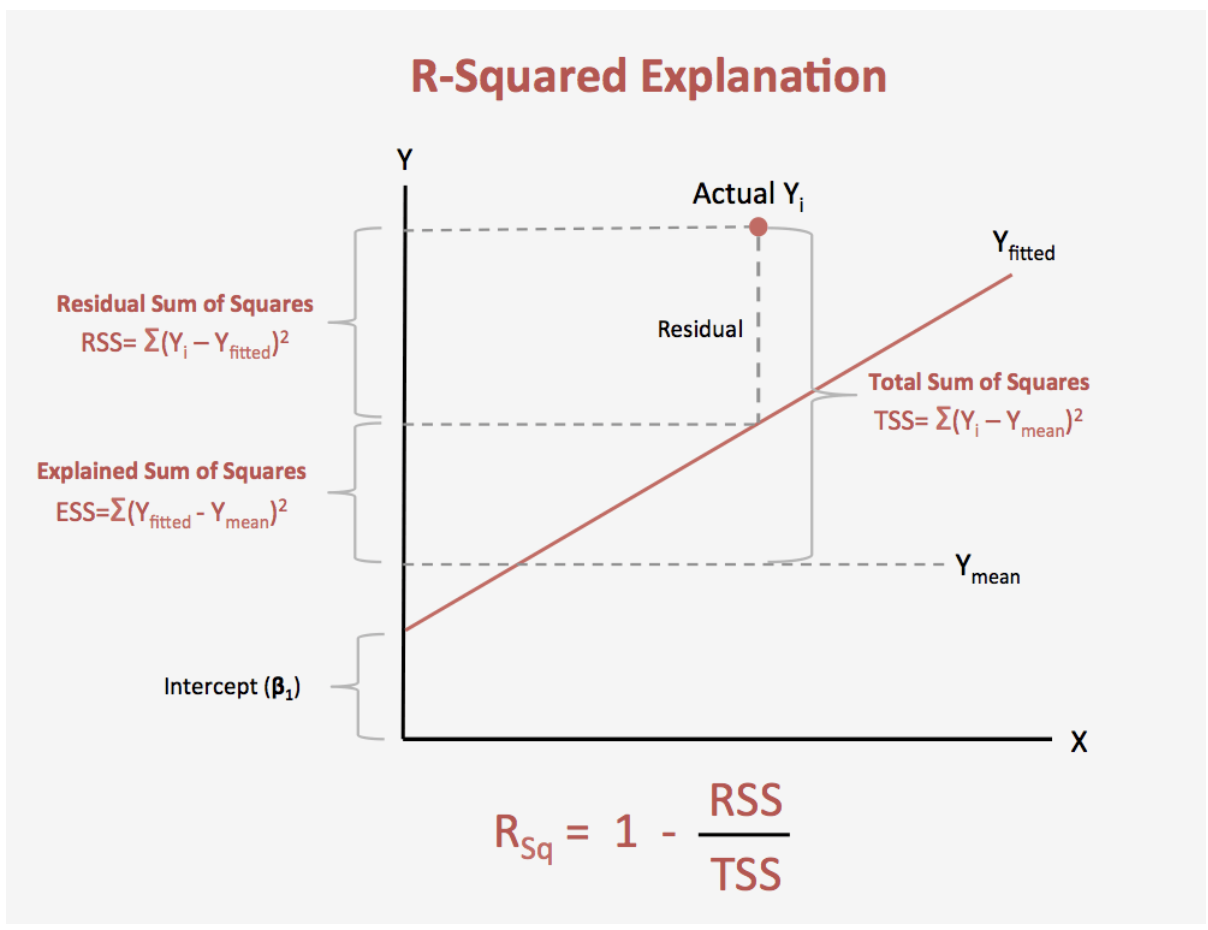

Calculation of $R^2$:
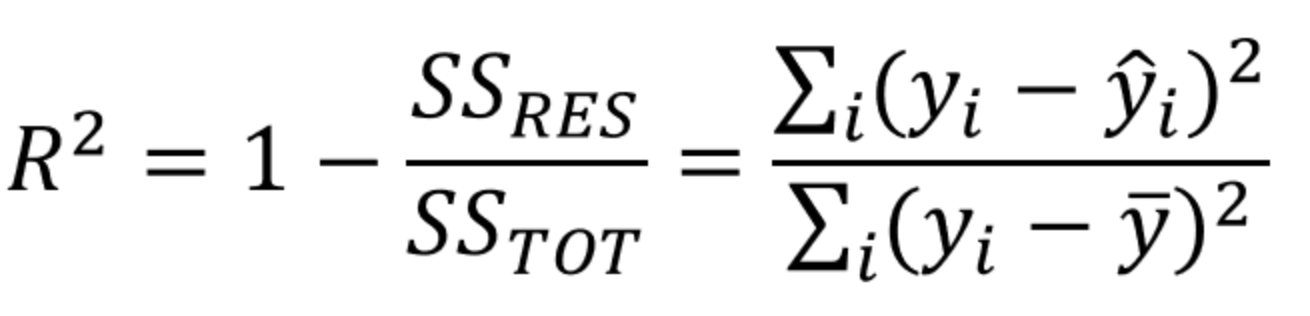


- Total variance:Total variance is the sum of unexplained variance and explained variance
    - Unexplained variance (prediction error) comes from additional factors that we did not predict 
    - Explained variance (predicted deviation from the mean) is what we explain/predict using the regression equation
- Explained Variance:
    - How well our regression line is predicting one variable from another variable 
    - Coefficient of determination (r2 ) is the proportion of the total variance explained by the predictor variable 
    - e.g e.g., height and weight: r=.5, then r2 =.25 Height accounts for 25% of the variance in weight
- Unexplained Variance: 
    - The proportion of variance that is not being accounted for by X

In [72]:
# build a simple linear regression in python
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')

In [73]:
df = sns.load_dataset('mpg')

In [74]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [75]:
# we will only work with mpg and weight here 
df = df[['mpg','weight']]

In [76]:
df.shape

(398, 2)

In [53]:
df.head()

,mpg,weight
0,18.0,3504
1,15.0,3693
2,18.0,3436
3,16.0,3433
4,17.0,3449


Text(0.5,1,'Correlation plot')

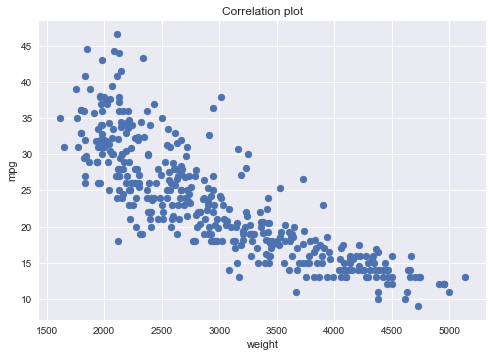

In [77]:
# check for correlation
plt.scatter(df.weight, df.mpg)
plt.xlabel('weight')
plt.ylabel('mpg')
plt.title("Correlation plot")
# what can we say about the correlation between mpg and weight?

In [55]:
# building a linear regression model using statsmodel 
lr_model = ols(formula='mpg~weight', data=df).fit()

In [56]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     888.9
Date:                Thu, 28 Feb 2019   Prob (F-statistic):          2.97e-103
Time:                        11:49:43   Log-Likelihood:                -1148.4
No. Observations:                 398   AIC:                             2301.
Df Residuals:                     396   BIC:                             2309.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     46.3174      0.795     58.243      0.000      44.754      47.881
weight        -0.0077      0.000    -29.814      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       40.423   Durbin-Watson:                   0.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.695
Skew:                           0.713   Prob(JB):                     4.89e-13
Kurtosis:                       4.176   Cond. No.                     1.13e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

What's the linear regression formula?
y = 46.32 - 0.007X

/Users/flee/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


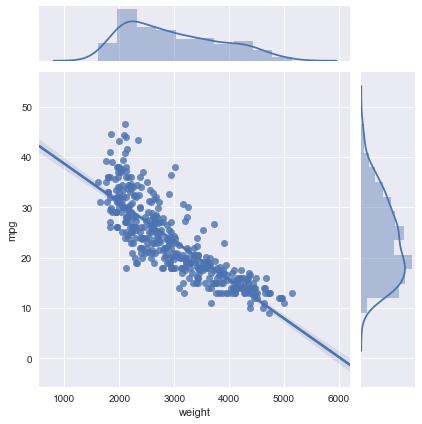

In [70]:
sns.jointplot(df['weight'], df['mpg'],kind = 'reg')

## Part IV. Assumptions of Linear Regression


1. Error is normally distributed $\epsilon ~ N(0, \sigma ^2)$
2. Error term is assumed to be independent
3. Homogeneity of Variance (Homoscedasticity)
4. Linearity

In [66]:
# checking for our model - Homoscedasticity
pred_val = lr_model.fittedvalues.copy()
true_val = df['mpg'].values.copy()
residual = true_val - pred_val

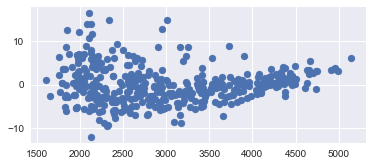

In [78]:
fig, ax = plt.subplots(figsize=(6,2.5))
ax.scatter(df['weight'],residual)

In [68]:
# variance is increasing as the mean of the X increases. It is not uncommon to see that 

0.9523990893322951

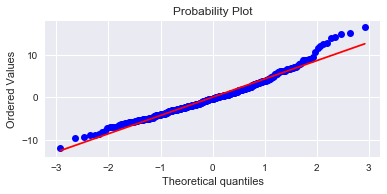

In [69]:
# checking for normality - QQ plot 
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
sp.stats.probplot(residual, plot=ax, fit=True)
r**2
0.9523990893322951

The Q-Q plot can answer questions such as:
- Do two data sets have common location and scale?
- Do two data sets have similar distributional shapes?
- Do two data sets have similar tail behavior?